In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive',force_remount=True)
root_dir="/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataframe = pd.read_csv(root_dir+'/BreastCancerdata.csv')
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(dataframe.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
print(dataframe['Unnamed: 32'].value_counts())

Series([], Name: Unnamed: 32, dtype: int64)


In [6]:
dataframe = dataframe.drop(['id','Unnamed: 32'], axis=1)


In [7]:
print(dataframe.describe())

       radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]


In [8]:
diagnosis_count = dataframe.groupby('diagnosis').size()
print(diagnosis_count)

diagnosis
B    357
M    212
dtype: int64


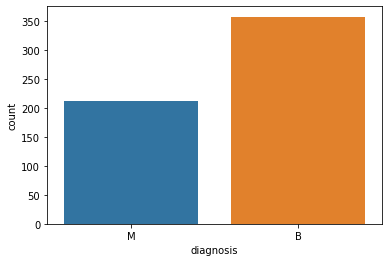

In [9]:
sns.countplot(x = dataframe['diagnosis'])
# plt.legend()
# sns.set_xticks(x)
plt.show()

In [10]:
data_mean= dataframe.iloc[:,0:10]
# data_mean

In [11]:
# sns.pairplot(data_mean, hue ='diagnosis')
# plt.show()

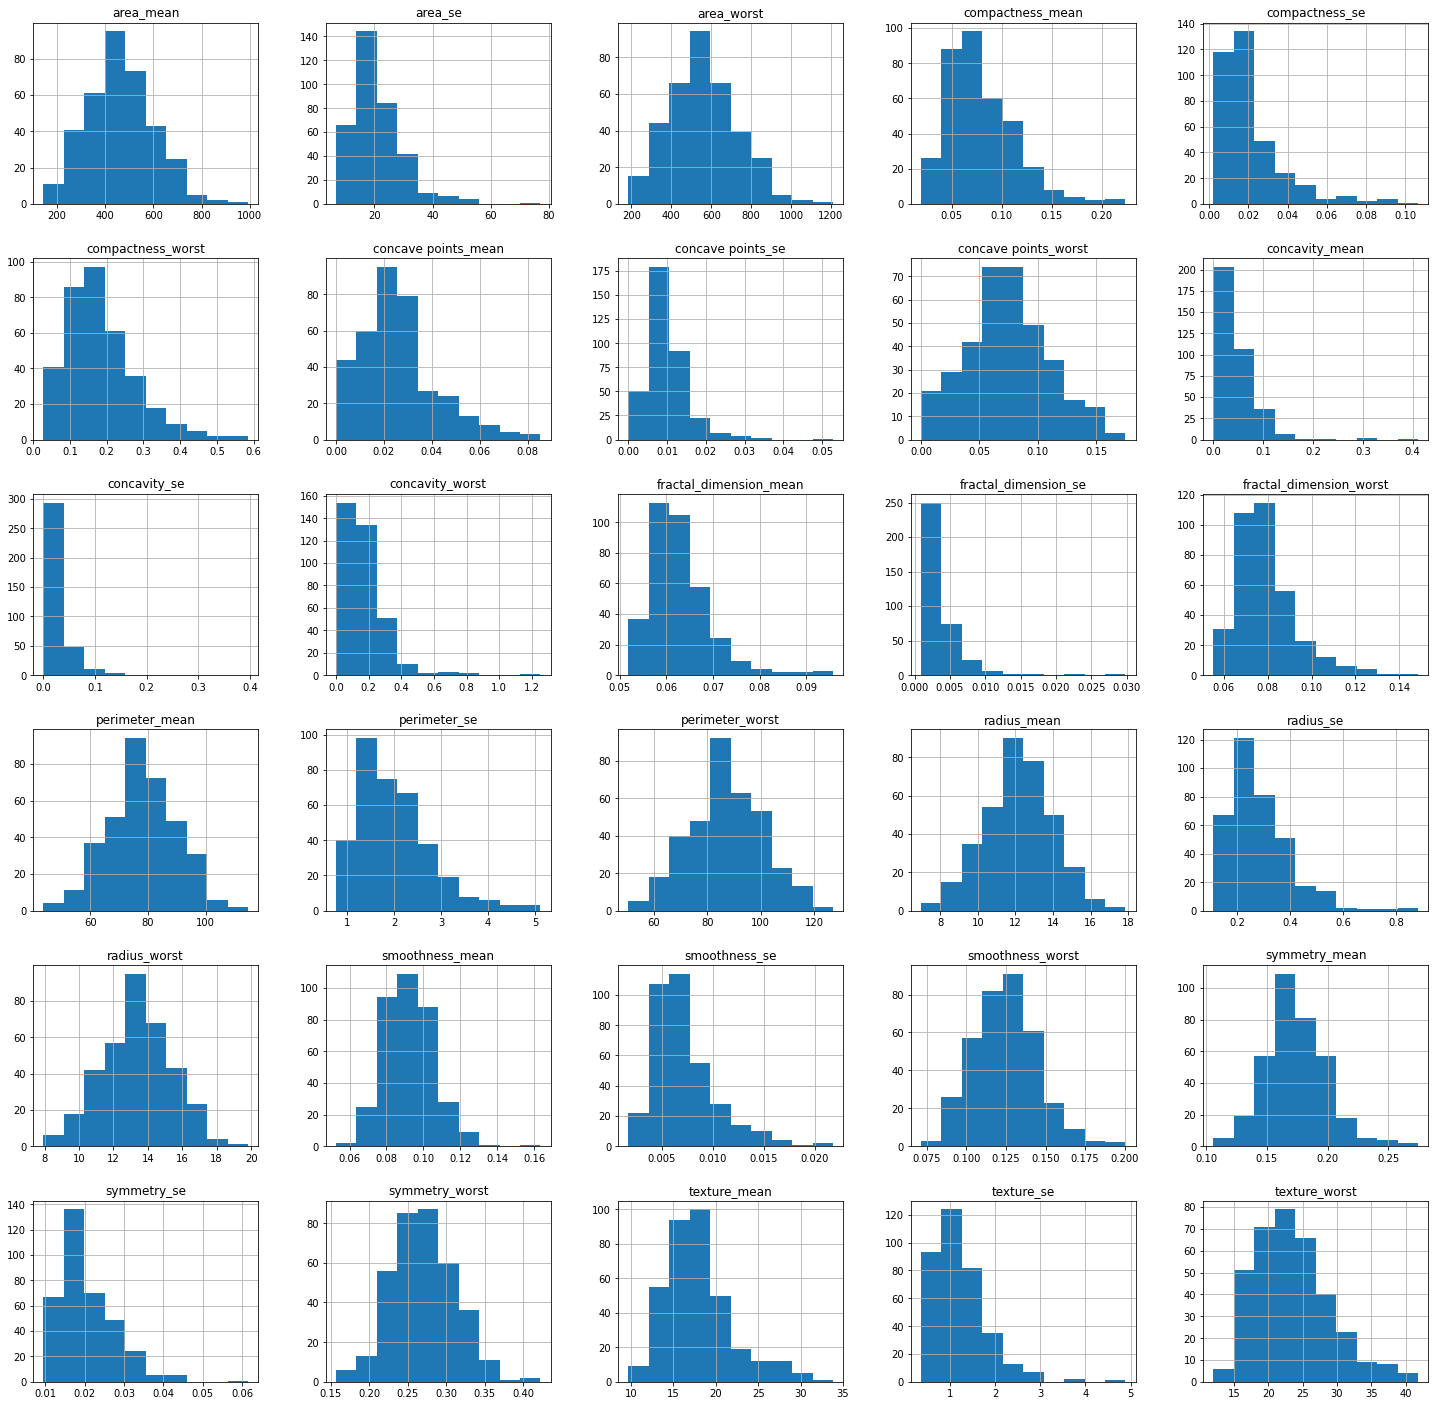

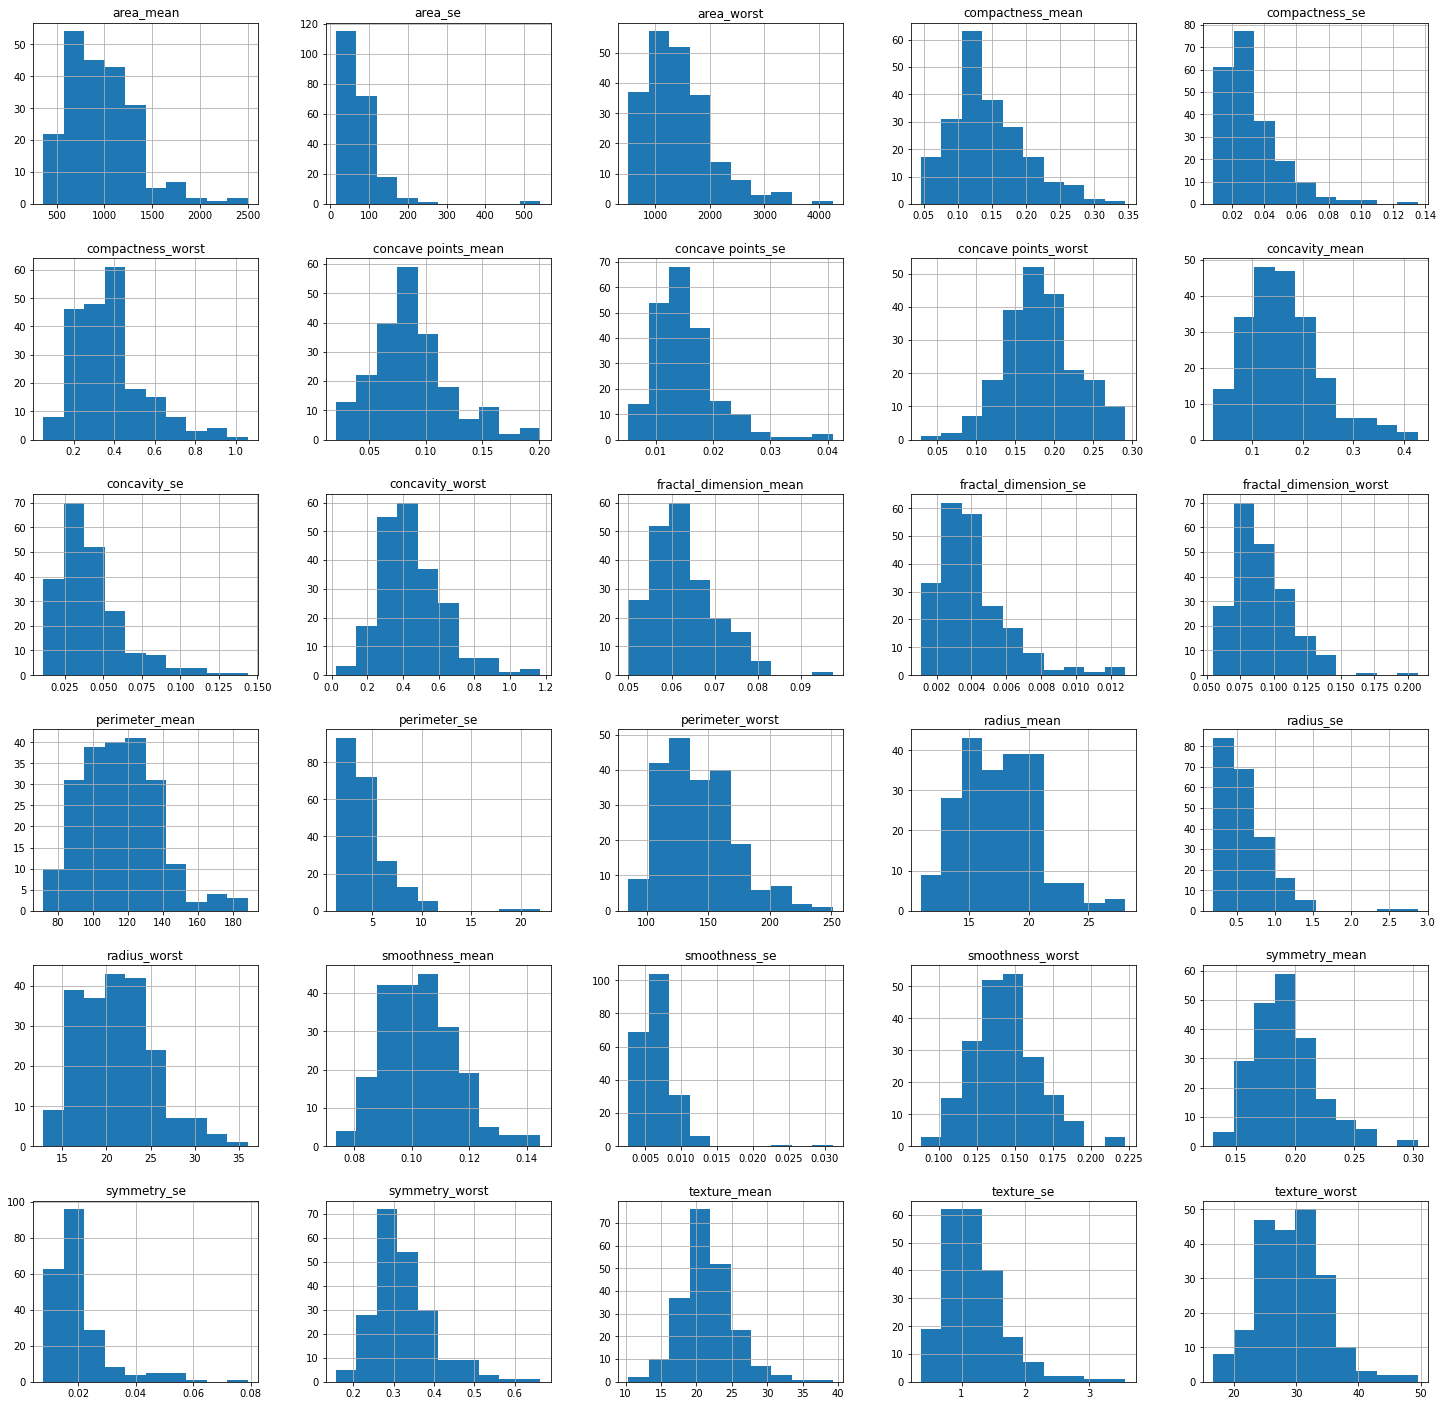

In [12]:
dataframe.groupby('diagnosis').hist(figsize=(25,25))
# abc = plt.gcf()
plt.show()
# plt.draw()
# abc.savefig('Histogram1.png', dpi=100)

In [13]:
diagnosis = dataframe[['diagnosis']]
df = dataframe.drop(['diagnosis'],axis =1)
# print(diagnosis)
# print(df.head())

Standardizing data, since the describe() tells us that the data is not evenly spread across each attribute's mean.

In [14]:
from sklearn import preprocessing
names = df.columns
scaler = preprocessing.RobustScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = names)
# scaled_df

Pearson Correlation

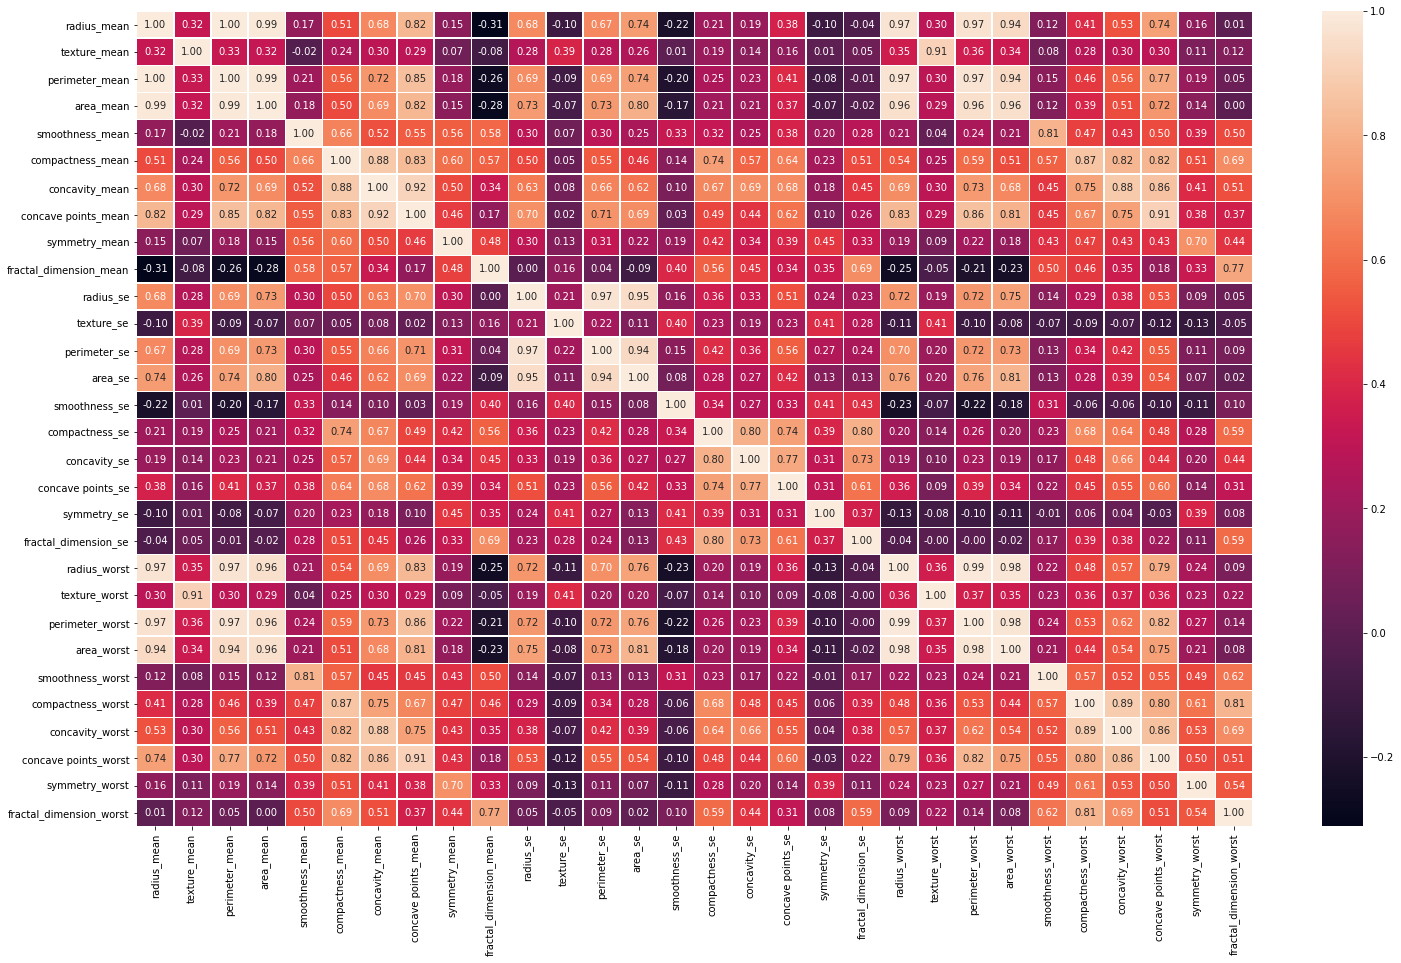

In [15]:
df_corr = scaled_df.corr(method = 'pearson') ### No difference after standardizing data, pearson values are the same!
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_corr, annot= True,fmt='.2f',linewidths = 0.5, ax=ax)
plt.show()

Exploring attributes with zero correlation

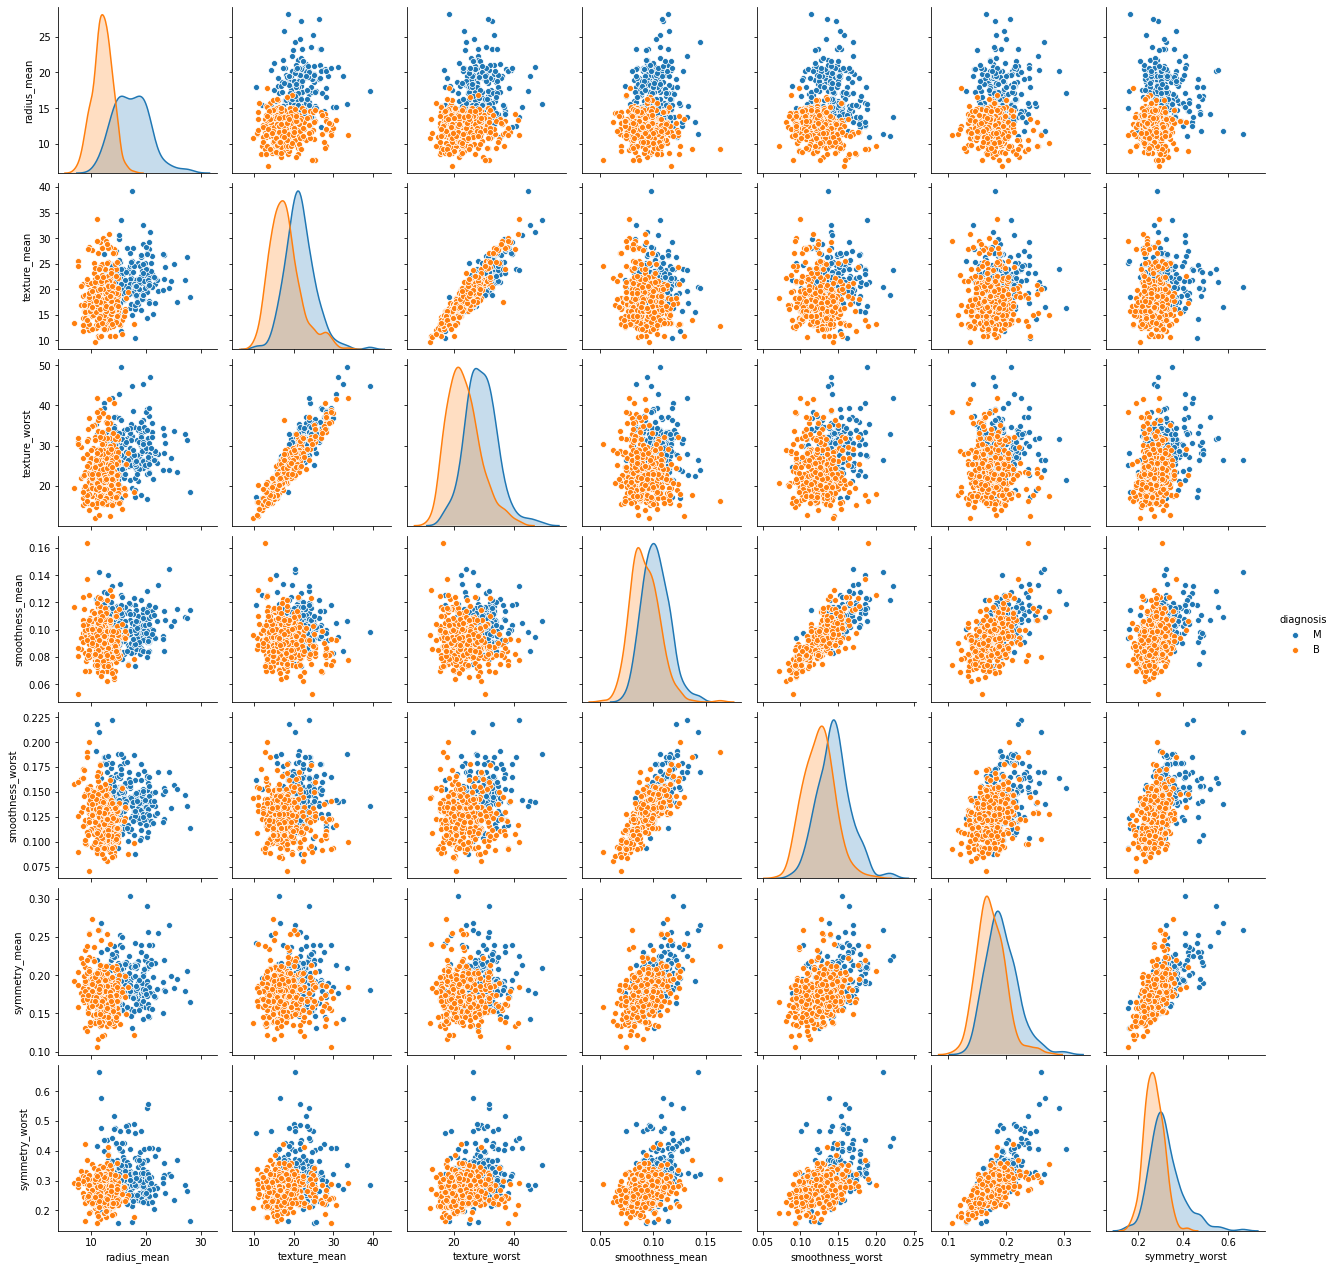

In [16]:
df_unrelated = dataframe.loc[:, ['radius_mean','texture_mean', 'texture_worst','smoothness_mean','smoothness_worst','symmetry_mean','symmetry_worst','diagnosis']]
sns.pairplot(df_unrelated, hue = 'diagnosis')
plt.show()

Above pairplots show, that the attributes with almost 0 pearson coefficient and are not correlated at all. (Neither linearly not in any other form) 


Exploring attributes with large negative correlation

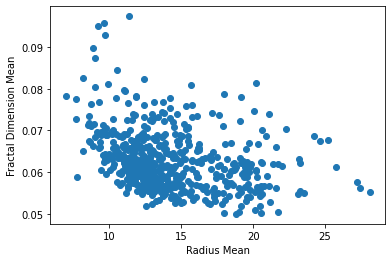

In [17]:
plt.scatter(x= dataframe['radius_mean'], y=dataframe['fractal_dimension_mean'])
plt.xlabel('Radius Mean')
plt.ylabel('Fractal Dimension Mean')
plt.show()

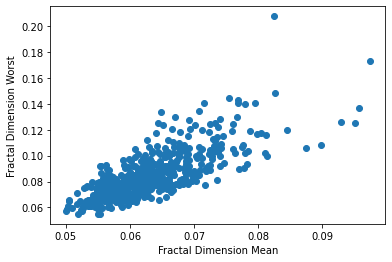

In [18]:
plt.scatter(x = dataframe['fractal_dimension_mean'], y=dataframe['fractal_dimension_worst'])
plt.xlabel('Fractal Dimension Mean')
plt.ylabel('Fractal Dimension Worst')
plt.show()

The above scatter plots show that attributes that have a negative pearson's coefficient arent as highly correlated as attributes with positive pearson's coefficient.
Hence less number of attributes are negatively correlated.

#Outlier detection

Using the default quartiles : IQR = Q3 -Q1, lower 1.5*IQR whisker = Q1-1.5*IQR, upper 1.5*IQR whisker = Q3+1.5*IQR

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

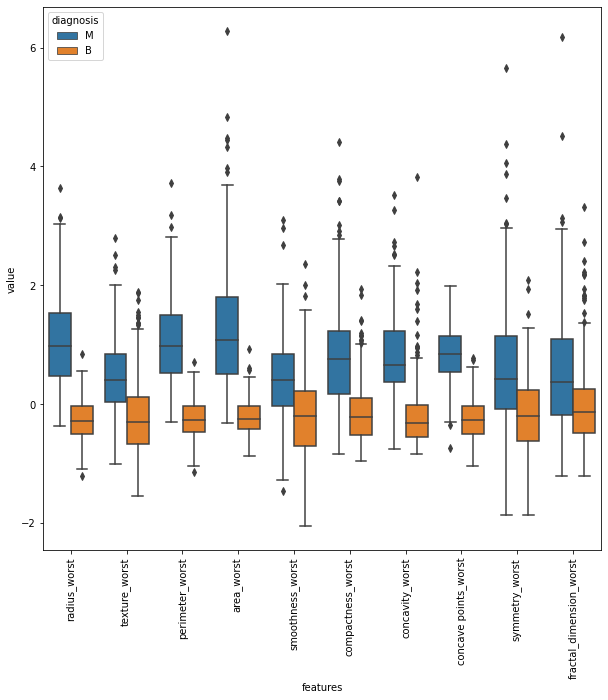

In [19]:
data_worst = pd.concat([diagnosis,scaled_df.iloc[:,20:31]],axis=1)
data_worst = pd.melt(data_worst,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_worst)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

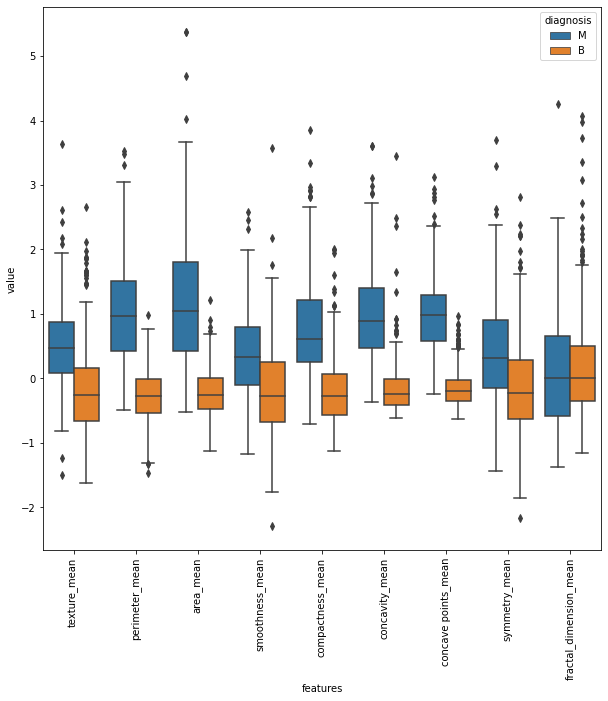

In [20]:
data_mean = pd.concat([diagnosis,scaled_df.iloc[:,1:10]],axis=1)
data_mean = pd.melt(data_mean,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_mean)
plt.xticks(rotation=90)
# dataframe.iloc[:,1:10]
# scaled_df.type

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

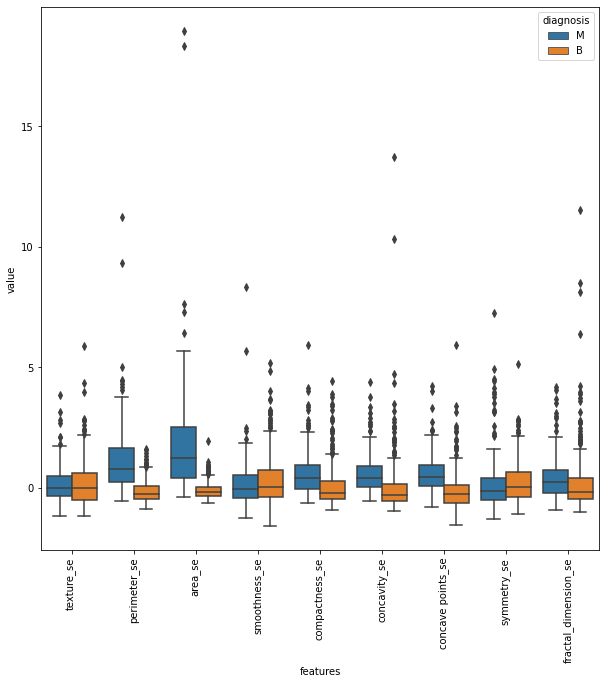

In [21]:
data_se = pd.concat([diagnosis,scaled_df.iloc[:,11:20]],axis=1)
data_se = pd.melt(data_se,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_se)
plt.xticks(rotation=90)

Since all groups have a number of outliers, we'll remove them.

In [23]:
###### Removing outliers. Writing a function
def detect_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    filter =(df >= Q1 - 1.5*IQR) & (df <= Q3 + 1.5*IQR)
    return df.loc[filter].replace()

In [24]:
area_mean_new = detect_outlier(scaled_df['area_mean'])
print(len(area_mean_new))

544


Since outliers areonly making up for roughly 5% of the dataset, its accepatble to ignore them. Hopefully they wont cause much problem in accuracy of the machine learning algorithms

#Feature selection 

Methods explored : 1.heatmap (previously) 2.Univariate Selection 3.Feature Importance

2. **Univariate Selection** ->  Sklearn has a built in function for this. Using that and selecting most important 20 features

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(df,diagnosis)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                   Specs          Score
23            area_worst  112598.431564
3              area_mean   53991.655924
13               area_se    8758.504705
22       perimeter_worst    3665.035416
2         perimeter_mean    2011.102864
20          radius_worst     491.689157
0            radius_mean     266.104917
12          perimeter_se     250.571896
21         texture_worst     174.449400
1           texture_mean      93.897508
26       concavity_worst      39.516915
10             radius_se      34.675247
6         concavity_mean      19.712354
25     compactness_worst      19.314922
27  concave points_worst      13.485419
7    concave points_mean      10.544035
5       compactness_mean       5.403075
28        symmetry_worst       1.298861
16          concavity_se       1.044718
15        compactness_se       0.613785


3. **Feature Importance** -> we use tree based classifier, built in for feature importance. In this case, higher the score, higher importance of that attribute

[0.0561976  0.02442572 0.07370062 0.04854771 0.00980478 0.01599062
 0.04584394 0.08646391 0.00830654 0.00667614 0.0215187  0.00568792
 0.01371235 0.03046773 0.00569815 0.00937815 0.00725166 0.01013269
 0.00520658 0.00481678 0.08607164 0.02817003 0.08676797 0.07537755
 0.01885406 0.02282178 0.0267337  0.14179082 0.01274068 0.01084349]


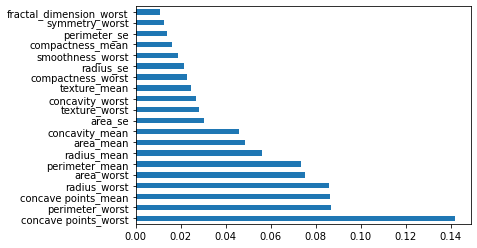

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df,diagnosis)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Choosing the following features:
1. area_mean                 2. area_worst             3. area_se
4. perimeter_worst           5. perimeter_mean         6. perimeter_se
7. texture_worst             8.texture_mean            9. concavity_mean
10. concavity_worst          11.compactness_worst      12.compactness_mean
13. concave points_ worst    14.concave points_mean    15.texture_mean
16. smoothness_mean          17.radius_mean            18.fractal_dimension_mean
19. symmetry_mean            20.fractal_dimension_worst

In [28]:
selected_features_df = dataframe[['area_mean', 'area_worst', 'area_se','perimeter_worst','perimeter_mean', 'perimeter_se',
'texture_worst','texture_mean','concavity_mean','concavity_worst','compactness_worst', 'compactness_mean',
'concave points_worst','concave points_mean', 'texture_mean',
'smoothness_mean','radius_mean','fractal_dimension_mean','symmetry_mean','fractal_dimension_worst']]
# selected_features_df

#Model Training

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score

In [30]:

X_train, X_test, Y_train, Y_test = train_test_split(selected_features_df, diagnosis, test_size = 0.25, random_state = 0)


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
current_test_classifier = LogisticRegression(random_state = 0)
current_test_classifier.fit(X_train, Y_train)
predictions = current_test_classifier.predict(X_test)
### Score of the model
a_score = accuracy_score(np.array(Y_test['diagnosis']), predictions)
print('Accuracy Score = '+str(a_score*100) + '%')
p_score = precision_score(np.array(Y_test['diagnosis']), predictions, average='macro')
print('Precision Score = ' + str(p_score*100) + '%')

Accuracy Score = 95.1048951048951%
Precision Score = 94.38628899835797%


### KNN Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
current_test_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
current_test_classifier.fit(X_train, Y_train)
predictions = current_test_classifier.predict(X_test)
### Score of the model
a_score = accuracy_score(np.array(Y_test['diagnosis']), predictions)
print('Accuracy Score = '+str(a_score*100) + '%')
p_score = precision_score(np.array(Y_test['diagnosis']), predictions, average='macro')
print('Precision Score = ' + str(p_score*100) + '%')

Accuracy Score = 93.7062937062937%
Precision Score = 93.12317935913441%


### Fitting SVM

In [33]:
from sklearn.svm import SVC
current_test_classifier = SVC(kernel = 'linear', random_state = 0)
current_test_classifier.fit(X_train, Y_train)
predictions = current_test_classifier.predict(X_test)
### Score of the model
a_score = accuracy_score(np.array(Y_test['diagnosis']), predictions)
print('Accuracy Score = '+str(a_score*100) + '%')
p_score = precision_score(np.array(Y_test['diagnosis']), predictions, average='macro')
print('Precision Score = ' + str(p_score*100) + '%')

Accuracy Score = 95.1048951048951%
Precision Score = 94.2393509127789%


### Fitting K-SVM

In [34]:
from sklearn.svm import SVC
current_test_classifier = SVC(kernel = 'rbf', random_state = 0)
current_test_classifier.fit(X_train, Y_train)
predictions = current_test_classifier.predict(X_test)
### Score of the model
a_score = accuracy_score(np.array(Y_test['diagnosis']), predictions)
print('Accuracy Score = '+str(a_score*100) + '%')
p_score = precision_score(np.array(Y_test['diagnosis']), predictions, average='macro')
print('Precision Score = ' + str(p_score*100) + '%')

Accuracy Score = 93.7062937062937%
Precision Score = 94.78933213805469%


### Fitting Naive_Baye

In [35]:
from sklearn.naive_bayes import GaussianNB
current_test_classifier = GaussianNB()
current_test_classifier.fit(X_train, Y_train)
predictions = current_test_classifier.predict(X_test)
### Score of the model
a_score = accuracy_score(np.array(Y_test['diagnosis']), predictions)
print('Accuracy Score = '+str(a_score*100) + '%')
p_score = precision_score(np.array(Y_test['diagnosis']), predictions, average='macro')
print('Precision Score = ' + str(p_score*100) + '%')

Accuracy Score = 92.3076923076923%
Precision Score = 91.6354556803995%


### Fitting Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
current_test_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
current_test_classifier.fit(X_train, Y_train)
predictions = current_test_classifier.predict(X_test)
### Score of the model
a_score = accuracy_score(np.array(Y_test['diagnosis']), predictions)
print('Accuracy Score = '+str(a_score*100) + '%')
p_score = precision_score(np.array(Y_test['diagnosis']), predictions, average='macro')
print('Precision Score = ' + str(p_score*100) + '%')

Accuracy Score = 95.1048951048951%
Precision Score = 94.2393509127789%


### Fitting Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
current_test_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
current_test_classifier.fit(X_train, Y_train)
predictions = current_test_classifier.predict(X_test)
### Score of the model
a_score = accuracy_score(np.array(Y_test['diagnosis']), predictions)
print('Accuracy Score = '+str(a_score*100) + '%')
p_score = precision_score(np.array(Y_test['diagnosis']), predictions, average='macro')
print('Precision Score = ' + str(p_score*100) + '%')

Accuracy Score = 96.5034965034965%
Precision Score = 96.42857142857143%
